<a href="https://colab.research.google.com/github/greraldicus/VREMENNYE_RYADY/blob/main/dz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy


In [ ]:
# глобальные переменные, которые нам нужны для генерации всех шумов. Можно обойтись и без них.

duration = 5  # Продолжительность в секундах
sample_rate = 4100  # Частота дискретизации в Гц

In [ ]:
# счиетаем, сколько элементов будем генерировать.
#Не забываем привести к инту, так как и длительность (duration) и частота (sample_rate) могут быть вещественными

num_samples = int(duration * sample_rate)

In [ ]:
# генерируем просто белый шум, не озадачиваесь его распределением. И печатаем.

white_noise_simple = np.random.random(num_samples)

print(white_noise_simple)

[0.31561512 0.17764283 0.13901001 ... 0.37793822 0.42092296 0.93508172]


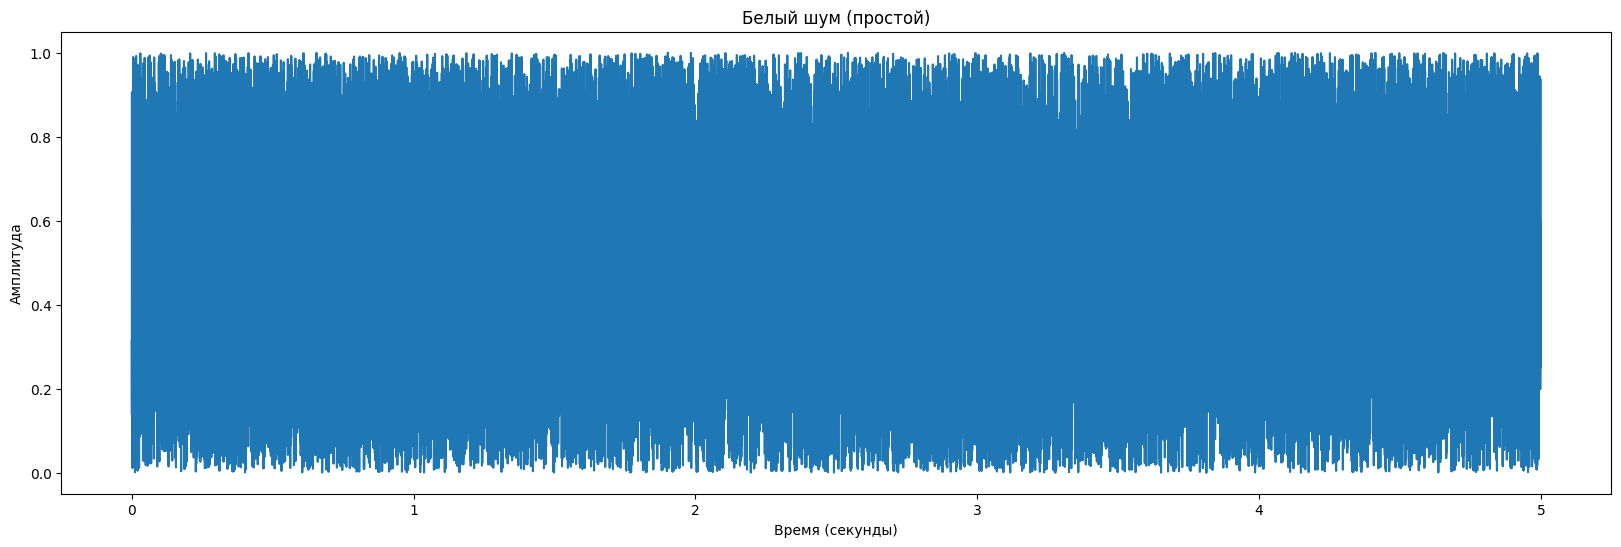

In [ ]:
# отрисовываем, что получилось

# создаем временную шкалу. Считаем, что она начинается с 0, до окончания записи (duretion).
# Между этими значениями равномерно заполняем ряд time_axis, чтобы в нем оказалось ровно столько элементов, сколько во временном ряду
time_axis = np.linspace(0, duration, len(white_noise_simple))

# заданем параметры полотна, на котором будем рисовать
plt.figure(figsize=(20, 6))

# определяем, что будем отрисовывать. По x - time_axis, по y - white_noise_simple
plt.plot(time_axis, white_noise_simple)

# заголовки
plt.title('Белый шум (простой)')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

# команда на отрисовку
plt.show()

In [ ]:
# генерируем гауссовский белый шум
# loc - медиана
# scale - стандартная девиация

white_noise_g = np.random.normal(loc = 0, scale = 1, size = num_samples)

print(white_noise_g)

[ 0.41812438 -0.69709512 -1.56677692 ... -2.30874754 -0.04863333
 -1.76983293]


[-0.01264493 -0.25805195 -0.21439611 ... -0.20240642 -0.21439611
 -0.25805195]


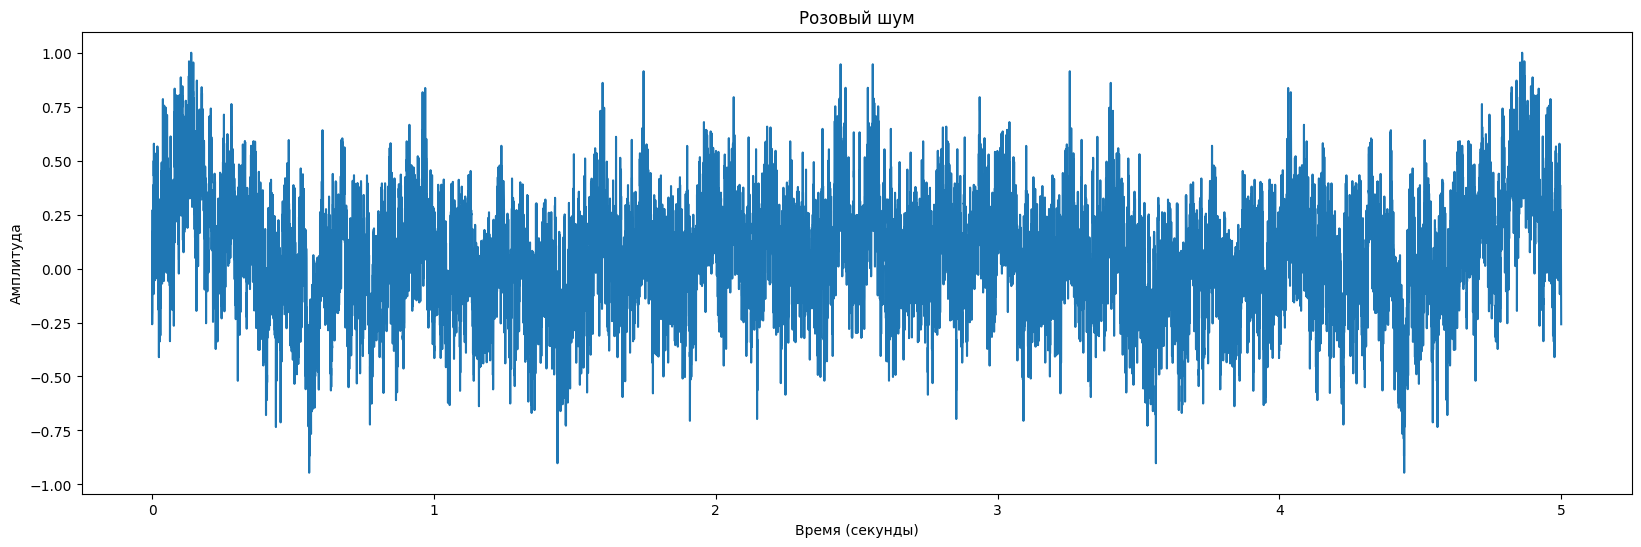

In [ ]:
spectrum = np.fft.rfft(white_noise_g)
pink_noise = np.real(spectrum) / np.sqrt(np.arange(1, len(spectrum) + 1))
pink_noise_real = np.fft.irfft(pink_noise, n=num_samples) / np.max(np.abs(np.fft.irfft(pink_noise, n=num_samples) ))
print(pink_noise_real)


time_axis = np.linspace(0, duration, len(pink_noise_real))

# заданем параметры полотна, на котором будем рисовать
plt.figure(figsize=(20, 6))

# определяем, что будем отрисовывать. По x - time_axis, по y - white_noise_simple
plt.plot(time_axis, pink_noise_real)

# заголовки
plt.title('Розовый шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

# команда на отрисовку
plt.show()

In [4]:
# Получение значений физических констант
kb = scipy.constants.k  # Константа Больцмана
h = scipy.constants.physical_constants['Planck constant'][0]  # Постоянная Планка
c = scipy.constants.c  # Скорость света

print(kb)
print(h)
print(c)

# Задание значений переменных
T = 17 * 1 / np.power(10, 9)  # Температура
G = 10  # Гравитационная постоянная

# Вычисление коэффициентов
coef1 = 2 * h / (c * c * T * T * T)
coef2 = h / (kb * T)

freq1 = 1000  # Частота

# Вычисление количества сэмплов
duration = 1  # Продолжительность
sample_rate = 44100  # Частота дискретизации
num_samples = int(duration * freq1)

# Создание массива для черного шума
black_noise = np.zeros(num_samples)

# Создание оси времени
time_axis = np.arange(num_samples) / sample_rate

# Создание массива для белого шума
white_noise_g = np.random.normal(loc = 0, scale = 1, size = num_samples)

# Вычисление эквализации
eq = 10 * np.log(coef1 * np.power(freq1, 3) / (np.exp(coef2 * freq1) - 1)) + 10

# Создание черного шума путем сложения белого шума и эквализации
black_noise = white_noise_g + eq

# Нормализация черного шума
black_noise /= np.max(np.abs(black_noise))


1.380649e-23
6.62607015e-34
299792458.0


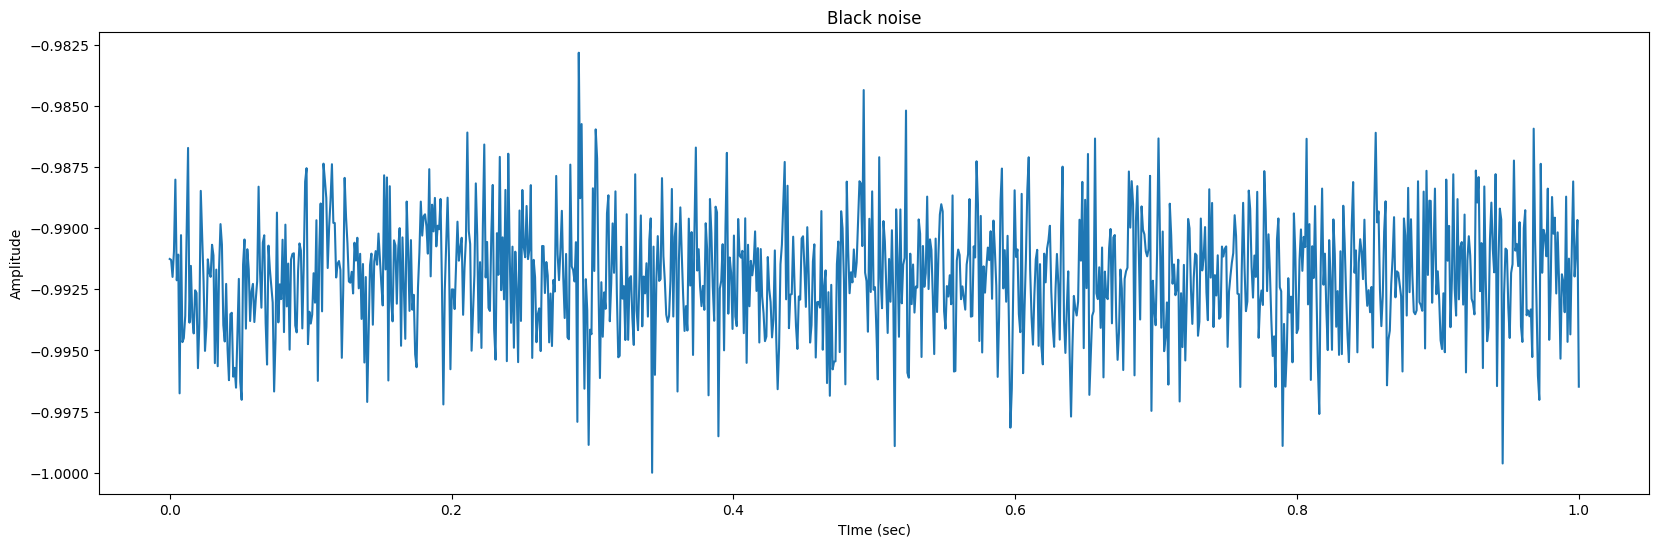

In [5]:
# Визуализация
time_axis = np.linspace(0, duration, len(black_noise))
plt.figure(figsize=(20, 6))
plt.plot(time_axis, black_noise)
plt.title('Black noise')
plt.xlabel('TIme (sec)')
plt.ylabel('Amplitude')
plt.show()

In [6]:
duration = 15  # Продолжительность в секундах
sample_rate = 4100  # Частота дискретизации в Гц
num_points = duration*sample_rate  # количество точек
time_points = np.linspace(0, duration, num_points)  # Создаем равномерные временные точки от 0 до 5 секунд
white_noise_base = np.random.normal(0,1,size=num_points)  # Генерим белый шум
values = np.sinh(time_points) # вычисляем амплитуды сигнала по синусоидальному закону
values_noise = values + white_noise_base # зашумляем сигнал

<ipython-input-7-79fa3ca7c847>:27: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([c0, c1, c2],


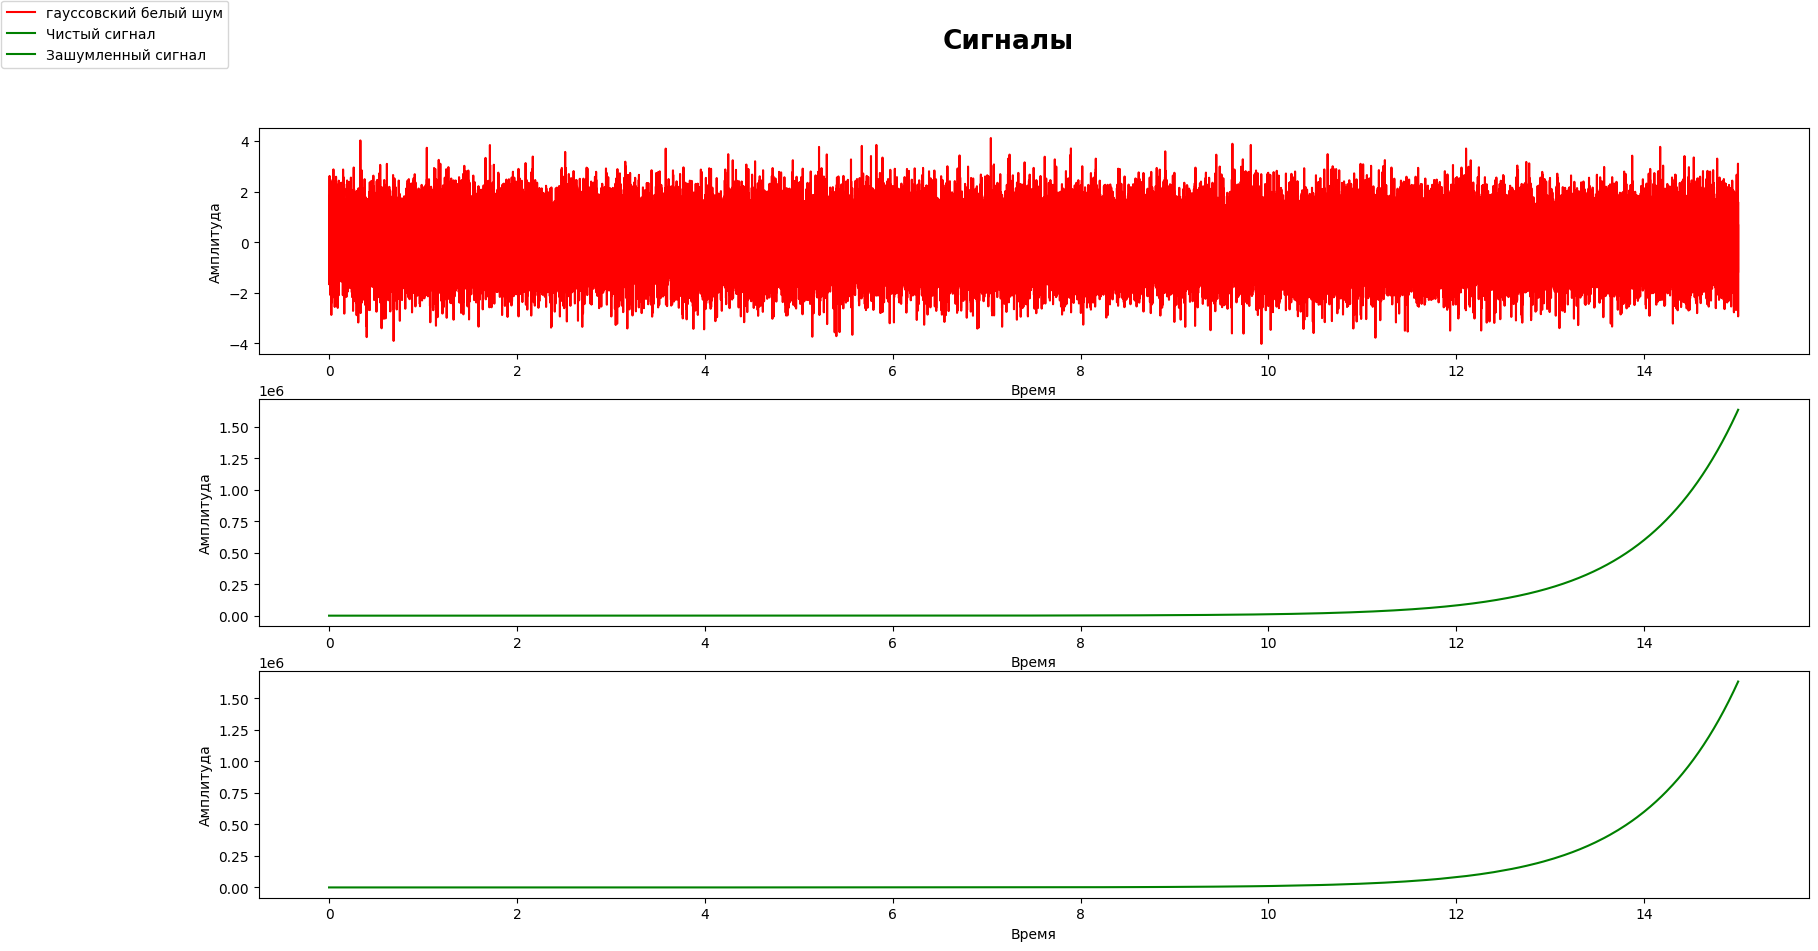

In [7]:
# Отрисовываем
# хотим нарисовать все на одном рисунке. Нам нужно 3 рисунка, один под другим.
fig, axs = plt.subplots(3, 1, figsize=(20, 10))


# общий заголовок для всей картинки
fig.suptitle('Сигналы', fontsize=19, fontweight='bold')

labels = ["гауссовский белый шум", "Чистый сигнал", "Зашумленный сигнал"]

# определяем, что будем отрисовывать на 1 графике. По x - время, по y - амплитуды
c0 = axs[0].plot(time_points, white_noise_base, color="red")
axs[0].set_xlabel('Время')
axs[0].set_ylabel('Амплитуда')

# определяем, что будем отрисовывать. По x - время, по y - амплитуды
c1 = axs[1].plot(time_points, values, color="green")
axs[1].set_xlabel('Время')
axs[1].set_ylabel('Амплитуда')

# определяем, что будем отрисовывать. По x - время, по y - амплитуды
c2 = axs[2].plot(time_points, values_noise, color="green")
axs[2].set_xlabel('Время')
axs[2].set_ylabel('Амплитуда')

# отрисовываем общую легенду
fig.legend([c0, c1, c2],
           labels=labels,
           loc='upper left',
           borderaxespad=0.1)